# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Read the csv data into a pandas dataframe and display the first 5 samples

In [2]:
dataset = pd.read_csv('Real estate.csv')
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [4]:
dataset.shape

(414, 8)

### What are the features available in the dataset?

In [5]:
dataset.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [6]:
datasetisnull = dataset.isnull()
datasetisnull.groupby('No').sum()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
False,0,0,0,0,0,0,0


There are no missing values in any features

In [7]:
datasetisnull

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


### Group all the features as dependent features in X

In [8]:
X = dataset[['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

In [9]:
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [10]:
y = dataset[['Y house price of unit area']]
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


# 1) For testing purposes, I am gonna run a couple of tests on the train_trst_split function in order to find the best accuracy/r2_score. For the first Iteration I am using 80% of data set for training and 20% for testing.

### Split the dataset into train and test data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
X_train.shape

(331, 7)

In [13]:
X_test.shape

(83, 7)

In [14]:
y_train.shape

(331, 1)

In [15]:
y_test.shape

(83, 1)

### Choose the model (Linear Regression)

In [16]:
chosenmodel = LinearRegression(fit_intercept = True)
chosenmodel

LinearRegression()

### Create an Estimator object

In [17]:
chosenmodelestimator = chosenmodel
chosenmodelestimator

LinearRegression()

### Train the model

In [18]:
chosenmodelestimator.fit(X, y)

LinearRegression()

In [19]:
chosenmodelestimator.coef_

array([[-3.59350128e-03,  5.07908732e+00, -2.70841959e-01,
        -4.52079011e-03,  1.12927749e+00,  2.24672892e+02,
        -1.44235635e+01]])

In [20]:
chosenmodelestimator.intercept_

array([-14038.07978292])

### Apply the model

In [21]:
y_pred = chosenmodelestimator.predict(X_test)

In [22]:
y_pred

array([[47.34924152],
       [40.69815138],
       [43.34746698],
       [39.20678333],
       [27.05782984],
       [45.50794239],
       [44.4831901 ],
       [46.53168074],
       [24.0437536 ],
       [54.76629818],
       [34.13415415],
       [36.64381765],
       [37.02784194],
       [23.86067762],
       [35.51336144],
       [33.53919606],
       [43.89609878],
       [45.21625484],
       [29.59936196],
       [44.70150697],
       [ 1.57339504],
       [35.48386229],
       [47.57541992],
       [45.68405197],
       [11.63335437],
       [38.72953552],
       [12.98787983],
       [43.09465602],
       [35.37848586],
       [37.38882862],
       [13.89809241],
       [40.12197202],
       [35.85292458],
       [28.52317152],
       [47.00535857],
       [30.67741002],
       [50.79701913],
       [13.65744228],
       [48.94114972],
       [39.59771905],
       [38.73649247],
       [40.19083191],
       [47.89494828],
       [37.24834958],
       [39.76284104],
       [47

### Display the coefficients

In [23]:
chosenmodelestimator.coef_

array([[-3.59350128e-03,  5.07908732e+00, -2.70841959e-01,
        -4.52079011e-03,  1.12927749e+00,  2.24672892e+02,
        -1.44235635e+01]])

In [24]:
chosenmodelestimator.intercept_

array([-14038.07978292])

### Find how well the trained model did with testing data

In [25]:
r2 = r2_score(y_test, y_pred)
print("Iteration 1 -> r2 score :", r2)

Iteration 1 -> r2 score : 0.6800217053026982


### Plot House Age Vs Price
#### Hint: Use regplot in sns

<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

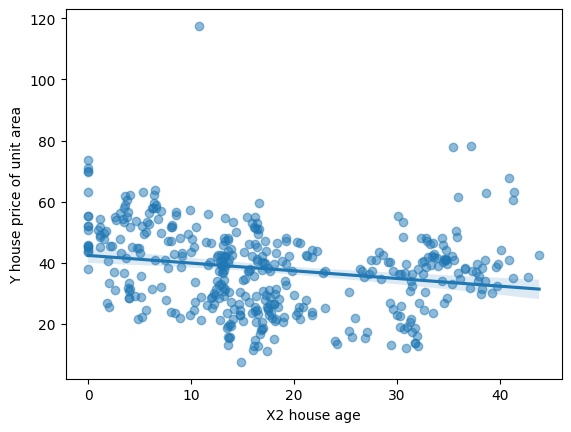

In [26]:
sns.regplot(x = 'X2 house age', y = 'Y house price of unit area', data = dataset, scatter_kws ={'alpha':0.5})

### Plot Distance to MRT station Vs Price

<Axes: xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

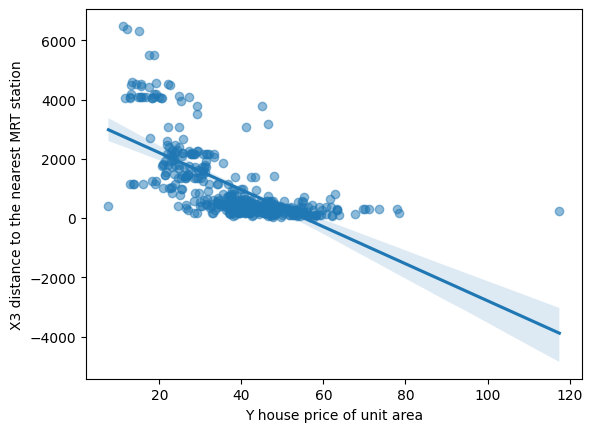

In [27]:
sns.regplot(x = 'Y house price of unit area', y = 'X3 distance to the nearest MRT station', data = dataset, scatter_kws ={'alpha':0.5})

### Plot Number of Convienience Stores Vs Price

<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

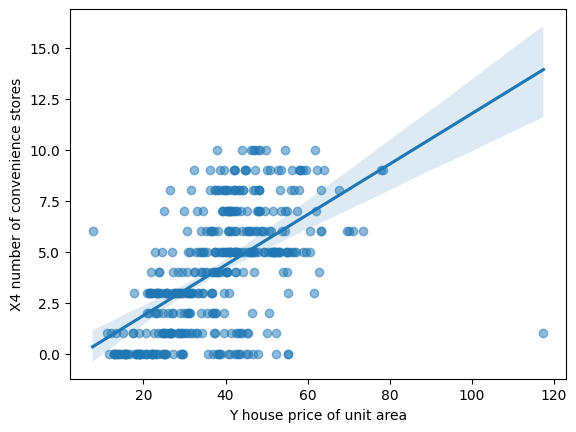

In [28]:
sns.regplot(x = 'Y house price of unit area', y = 'X4 number of convenience stores', data = dataset, scatter_kws ={'alpha':0.5})

# 2) I am using 70% of data for training and 30 % of data for testing.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
chosenmodel2 = LinearRegression(fit_intercept = True)

In [31]:
chosenmodel2.fit(X, y)

LinearRegression()

In [32]:
y_pred = chosenmodel2.predict(X_test)

In [33]:
y_pred

array([[47.34924152],
       [40.69815138],
       [43.34746698],
       [39.20678333],
       [27.05782984],
       [45.50794239],
       [44.4831901 ],
       [46.53168074],
       [24.0437536 ],
       [54.76629818],
       [34.13415415],
       [36.64381765],
       [37.02784194],
       [23.86067762],
       [35.51336144],
       [33.53919606],
       [43.89609878],
       [45.21625484],
       [29.59936196],
       [44.70150697],
       [ 1.57339504],
       [35.48386229],
       [47.57541992],
       [45.68405197],
       [11.63335437],
       [38.72953552],
       [12.98787983],
       [43.09465602],
       [35.37848586],
       [37.38882862],
       [13.89809241],
       [40.12197202],
       [35.85292458],
       [28.52317152],
       [47.00535857],
       [30.67741002],
       [50.79701913],
       [13.65744228],
       [48.94114972],
       [39.59771905],
       [38.73649247],
       [40.19083191],
       [47.89494828],
       [37.24834958],
       [39.76284104],
       [47

In [34]:
chosenmodel2.coef_

array([[-3.59350128e-03,  5.07908732e+00, -2.70841959e-01,
        -4.52079011e-03,  1.12927749e+00,  2.24672892e+02,
        -1.44235635e+01]])

In [35]:
chosenmodel2.intercept_

array([-14038.07978292])

In [36]:
r2 = r2_score(y_test, y_pred)
print("Iteration 2 -> r2 score :", r2)

Iteration 2 -> r2 score : 0.5716793646933317


# Iteration 3) Using 83% data for training and 17% for testing.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.17, random_state = 42)

chosenmodel3 = LinearRegression(fit_intercept = True)

chosenmodel3.fit(X, y)

y_pred = chosenmodel3.predict(X_test)

y_pred

chosenmodel2.coef_

chosenmodel2.intercept_

r2 = r2_score(y_test, y_pred)
print("Iteration 3 -> r2 score :", r2)

Iteration 3 -> r2 score : 0.6938180770575204


Here are the scores from three iterations:
1) 80-20 Split : Iteration 1 -> r2 score : 0.68
2) 70-30 Split : Iteration 2 -> r2 score : 0.57
3) 83-17 Split : Iteration 3 -> r2 score : 0.69

CONCLUSION: